In [81]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da linguagem Python usada neste Jupyter Notebook: ', python_version())

Versão da linguagem Python usada neste Jupyter Notebook:  3.9.7


In [82]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os Dados

In [83]:
dadosRH = pd.read_csv('data/dadosRH.csv')

In [84]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [85]:
dadosRH.shape

(54808, 11)

### Análise Exploratória, Limpeza e Tranformação de Dados

#### Vamos manipular os dados e corrigir eventuais problemas.

In [86]:
# total de valores nulos
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [87]:
dadosRH.groupby(['educacao']).count()
# não está considerando os valores ausentes

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


C:\Users\Administrador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educacao', ylabel='count'>

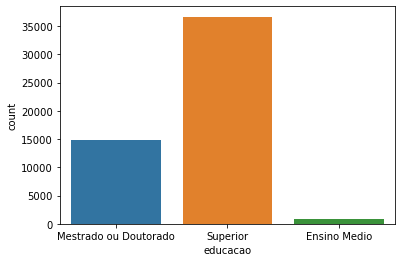

In [88]:
sns.countplot(dadosRH['educacao'])

In [89]:
dadosRH.groupby(['aval_ano_anterior']).count() # não está considerando os valores ausentes

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


C:\Users\Administrador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

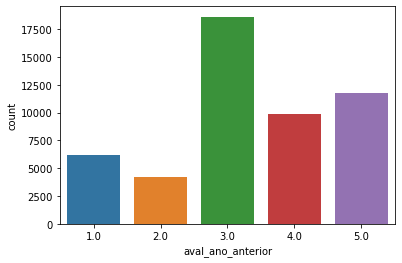

In [90]:
sns.countplot(dadosRH['aval_ano_anterior'])

##### Vamos aplicar imputação e preencher os valores ausentes

In [91]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace=True)
# preencher com a moda da tabela educacao

In [92]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(), inplace=True)
# preencher com a mediana da tabela aval_ano_anterior

In [93]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [94]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,805,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14925,14925,14925
Superior,39078,39078,39078,39078,39078,39078,39078,39078,39078,39078


In [95]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,6223,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4225,4225,4225,4225,4225,4225,4225
3.0,22742,22742,22742,22742,22742,22742,22742,22742,22742,22742
4.0,9877,9877,9877,9877,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11741,11741,11741,11741,11741,11741,11741


##### Vamos verificar o balanceamento de classe na variável "promovido"

In [96]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


C:\Users\Administrador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

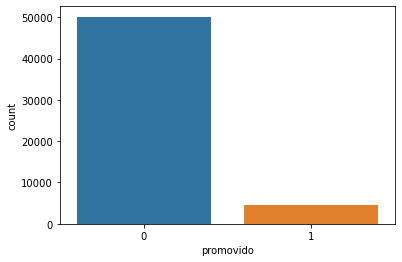

In [97]:
sns.countplot(dadosRH['promovido'])

In [98]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [99]:
df_classe_majoritaria.shape

(50140, 11)

In [100]:
df_classe_minoritaria.shape

(4668, 11)

In [101]:
# Upsample da classe minoritária (aumentar os dados da classe minoritaria)
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample(df_classe_minoritaria, replace=True,n_samples=50140,random_state=150)

In [102]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [103]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [104]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


C:\Users\Administrador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promovido', ylabel='count'>

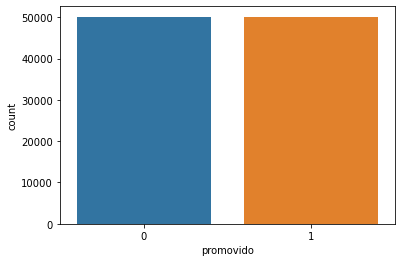

In [105]:
sns.countplot(dadosRH_balanceados['promovido'])

##### Os dados estão balanceados. Vamos salvar o dataset com os dados manipulados.

In [106]:
dadosRH_balanceados.to_csv('data/dadosRH_modificado.csv', encoding='utf-8', index=False)

##### Agora carregamos os dados e seguimos com o trabalho de análise.

###### A partir daqui executaremos também no Power BI.

In [107]:
dataset = pd.read_csv('data/dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [108]:
dataset.shape

(100280, 11)

#### Pegunta 1 - Qual a correlação entre os atributos dos funcionários?

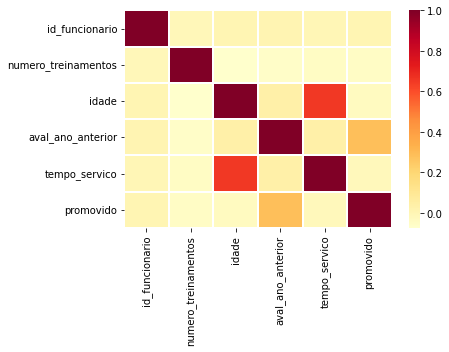

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.heatmap(corr, cmap="YlOrRd", linewidths=0.1) # cmap = mapa de cor
plt.show()

#### Pegunta 2 - Qual o tempo de serviço da maioria dos funcionários?

C:\Users\Administrador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


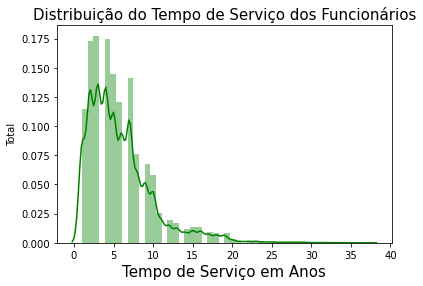

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color='green')
plt.title('Distribuição do Tempo de Serviço dos Funcionários', fontsize=15)
plt.xlabel('Tempo de Serviço em Anos', fontsize=15)
plt.ylabel('Total')
plt.show()

#### Pegunta 3 - Qual avaliação do ano anterior foi mais comum?

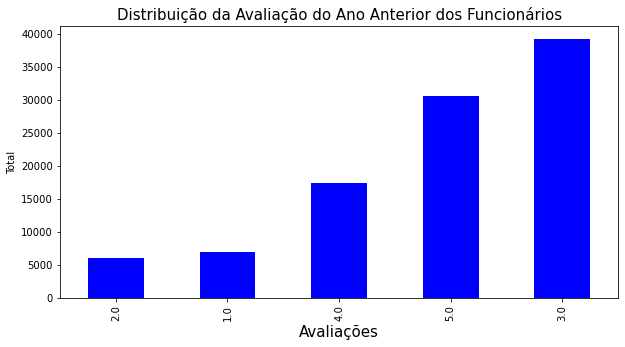

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color='blue', figsize=(10,5))
plt.title('Distribuição da Avaliação do Ano Anterior dos Funcionários', fontsize=15)
plt.xlabel('Avaliações', fontsize=15)
plt.ylabel('Total')
plt.show()

#### Pegunta 4 - Qual a distribuição das idades dos funcionários?

C:\Users\Administrador\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


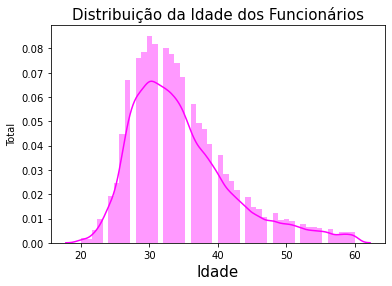

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color='magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize=15)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Total')
plt.show()

#### Pegunta 5 - Qual o número de treinamentos mais frequente?

C:\Users\Administrador\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


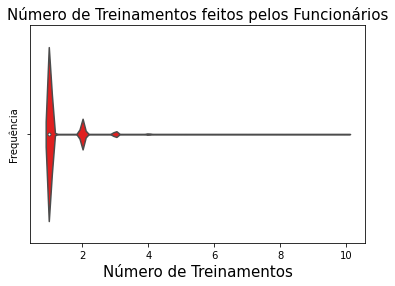

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color='red')
plt.title('Número de Treinamentos feitos pelos Funcionários', fontsize=15)
plt.xlabel('Número de Treinamentos', fontsize=15)
plt.ylabel('Frequência')
plt.show()

#### Pegunta 6 - Qual a proporção dos funcionários por canal de recrutamento?

In [114]:
dataset['canal_recrutamento'].value_counts()

Outro          55375
Outsourcing    42358
Indicado        2547
Name: canal_recrutamento, dtype: int64

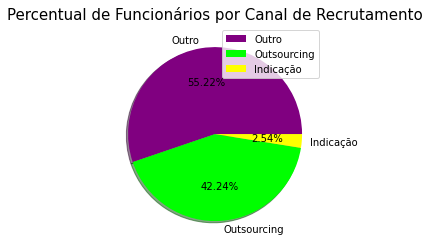

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375, 42358, 2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode = [0, 0, 0]
plt.pie(fatias, labels=labels, colors=colors, explode=explode, shadow=True, autopct="%.2f%%")
plt.title('Percentual de Funcionários por Canal de Recrutamento', fontsize=15)
plt.axis('off')
plt.legend()
plt.show()

#### Pegunta 7 - Qual a relação entre a promoção e a avaliação do ano anterior?

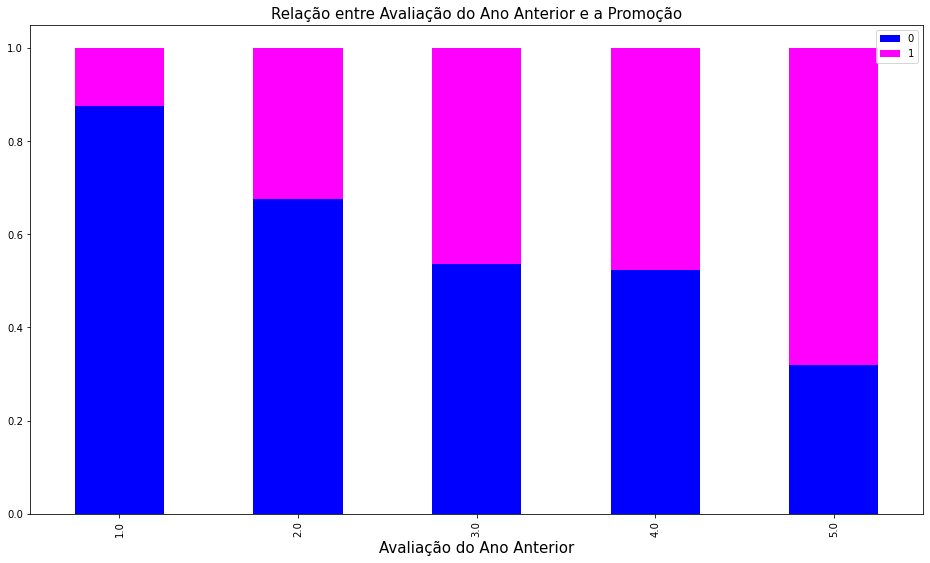

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', 
                                                stacked=True, 
                                                figsize=(16,9), 
                                                color=['blue', 'magenta'])
plt.title('Relação entre Avaliação do Ano Anterior e a Promoção', fontsize=15)
plt.xlabel('Avaliação do Ano Anterior', fontsize=15)
plt.legend()
plt.show()